这是一个inception net的简单测试，inception是我之前用keras写的，测试的数据是猫狗的二分类问题  
数据来源 https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data 可能需要vpn  
里面有12500张狗和12500张猫，我选了了1000张狗和1000张猫作为测试，下面是测试代码

In [1]:
# import keras

# from keras.layers import Activation, MaxPooling2D, Conv2D, Dense, Input, Dropout
# from keras.layers import Flatten, BatchNormalization, AveragePooling2D
# from keras.models import Model
# from keras import layers
# from keras import optimizers

# def conv2d_bn(x, filters, num_row, num_col, padding='same', strides=(1, 1)):
#     x = Conv2D(filters, (num_row, num_col), strides=strides, padding=padding, use_bias=False)(x)
#     x = BatchNormalization(axis=-1)(x)
#     x = Activation('relu')(x)
#     return x

# def InceptionV3(img_input):
#     x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid')
#     x = conv2d_bn(x, 32, 3, 3, padding='valid')
#     x = conv2d_bn(x, 64, 3, 3)
#     x = MaxPooling2D((3, 3), strides=(2, 2))(x)

#     x = conv2d_bn(x, 80, 1, 1, padding='valid')
#     x = conv2d_bn(x, 192, 3, 3, padding='valid')
#     x = MaxPooling2D((3, 3), strides=(2, 2))(x)

#     # mixed 0, 1, 2: 35 x 35 x 256
#     branch1x1 = conv2d_bn(x, 64, 1, 1)

#     branch5x5 = conv2d_bn(x, 48, 1, 1)
#     branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
#     x = keras.layers.concatenate(
#         [branch1x1, branch5x5, branch3x3dbl, branch_pool],
#         axis=-1)

#     # mixed 1: 35 x 35 x 256
#     branch1x1 = conv2d_bn(x, 64, 1, 1)

#     branch5x5 = conv2d_bn(x, 48, 1, 1)
#     branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch5x5, branch3x3dbl, branch_pool],
#         axis=-1)

#     # mixed 2: 35 x 35 x 256
#     branch1x1 = conv2d_bn(x, 64, 1, 1)

#     branch5x5 = conv2d_bn(x, 48, 1, 1)
#     branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch5x5, branch3x3dbl, branch_pool],
#         axis=-1)

#     # mixed 3: 17 x 17 x 768
#     branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

#     branch3x3dbl = conv2d_bn(x, 64, 1, 1)
#     branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
#     branch3x3dbl = conv2d_bn(
#         branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

#     branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
#     x = layers.concatenate(
#         [branch3x3, branch3x3dbl, branch_pool], axis=-1)

#     # mixed 4: 17 x 17 x 768
#     branch1x1 = conv2d_bn(x, 192, 1, 1)

#     branch7x7 = conv2d_bn(x, 128, 1, 1)
#     branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
#     branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

#     branch7x7dbl = conv2d_bn(x, 128, 1, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch7x7, branch7x7dbl, branch_pool],
#         axis=-1)

#     # mixed 5, 6: 17 x 17 x 768
#     for i in range(2):
#         branch1x1 = conv2d_bn(x, 192, 1, 1)

#         branch7x7 = conv2d_bn(x, 160, 1, 1)
#         branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
#         branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

#         branch7x7dbl = conv2d_bn(x, 160, 1, 1)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
#         branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

#         branch_pool = AveragePooling2D(
#             (3, 3), strides=(1, 1), padding='same')(x)
#         branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#         x = layers.concatenate(
#             [branch1x1, branch7x7, branch7x7dbl, branch_pool],
#             axis=-1)

#     # mixed 7: 17 x 17 x 768
#     branch1x1 = conv2d_bn(x, 192, 1, 1)

#     branch7x7 = conv2d_bn(x, 192, 1, 1)
#     branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
#     branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

#     branch7x7dbl = conv2d_bn(x, 192, 1, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
#     branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

#     branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
#     branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#     x = layers.concatenate(
#         [branch1x1, branch7x7, branch7x7dbl, branch_pool],
#         axis=-1)

#     # mixed 8: 8 x 8 x 1280
#     branch3x3 = conv2d_bn(x, 192, 1, 1)
#     branch3x3 = conv2d_bn(branch3x3, 320, 3, 3,
#                           strides=(2, 2), padding='valid')

#     branch7x7x3 = conv2d_bn(x, 192, 1, 1)
#     branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
#     branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
#     branch7x7x3 = conv2d_bn(
#         branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

#     branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
#     x = layers.concatenate(
#         [branch3x3, branch7x7x3, branch_pool], axis=-1)

#     # mixed 9: 8 x 8 x 2048
#     for i in range(2):
#         branch1x1 = conv2d_bn(x, 320, 1, 1)

#         branch3x3 = conv2d_bn(x, 384, 1, 1)
#         branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
#         branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
#         branch3x3 = layers.concatenate(
#             [branch3x3_1, branch3x3_2], axis=-1)

#         branch3x3dbl = conv2d_bn(x, 448, 1, 1)
#         branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
#         branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
#         branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
#         branch3x3dbl = layers.concatenate(
#             [branch3x3dbl_1, branch3x3dbl_2], axis=-1)

#         branch_pool = AveragePooling2D(
#             (3, 3), strides=(1, 1), padding='same')(x)
#         branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
#         x = layers.concatenate(
#             [branch1x1, branch3x3, branch3x3dbl, branch_pool],
#             axis=-1)
#     x = AveragePooling2D(5, 1, 'valid')(x)
#     x = Flatten()(x)
#     x = Dense(6, activation='sigmoid')(x)
#     model = Model(inputs=img_input, outputs=x)
#     return model

# input_tensor = Input(shape=(224, 224, 3))
# inception_model = InceptionV3(input_tensor)

# # from keras.utils.vis_utils import model_to_dot

# # mymodel = model_to_dot(inception_model, show_shapes=True)

# # mymodel.write_png('./model.png')

# # sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# # inception_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# # batch_size = 32

# # from keras.preprocessing.image import ImageDataGenerator

# # train_image = ImageDataGenerator(rescale=1./255)

# # train_generator = train_image.flow_from_directory('../data/train/province', target_size=(224, 224),
# #                                                  batch_size=batch_size,
# #                                                  class_mode='categorical'
# #                                                  )

# # inception_model.fit_generator(train_generator, steps_per_epoch=340//batch_size, epochs=20)

Using TensorFlow backend.


In [1]:
import keras

from keras.layers import Activation, MaxPooling2D, Conv2D, Dense, Input, Dropout
from keras.layers import Flatten, BatchNormalization, AveragePooling2D
from keras.models import Model
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
mymodel = keras.applications.InceptionV3(include_top=True, input_shape=(299, 299, 3), weights=None, classes=6)

In [3]:
# mymodel.summary()

In [14]:
mymodel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 16

from keras.preprocessing.image import ImageDataGenerator

train_image = ImageDataGenerator(rescale=1./255)

train_generator = train_image.flow_from_directory('../data/train/province', target_size=(299, 299),
                                                 batch_size=batch_size,
                                                 class_mode='categorical'
                                                 )

mymodel.fit_generator(train_generator, steps_per_epoch=340//batch_size, epochs=20)

Found 300 images belonging to 6 classes.
Epoch 1/20
21/21 [==============================] - 21s - loss: 7.2252e-04 - acc: 1.0000    
Epoch 2/20
21/21 [==============================] - 17s - loss: 0.0247 - acc: 0.9940    
Epoch 3/20
21/21 [==============================] - 17s - loss: 0.0134 - acc: 0.9940    
Epoch 4/20
21/21 [==============================] - 17s - loss: 0.1991 - acc: 0.9425    
Epoch 5/20
21/21 [==============================] - 17s - loss: 0.0660 - acc: 0.9732    
Epoch 6/20
21/21 [==============================] - 17s - loss: 0.0050 - acc: 0.9970    
Epoch 7/20
21/21 [==============================] - 17s - loss: 4.5573e-04 - acc: 1.0000    
Epoch 8/20
21/21 [==============================] - 17s - loss: 8.1867e-04 - acc: 1.0000    
Epoch 9/20
21/21 [==============================] - 17s - loss: 4.9362e-04 - acc: 1.0000    
Epoch 10/20
21/21 [==============================] - 17s - loss: 4.7447e-04 - acc: 1.0000    
Epoch 11/20
21/21 [=============================

In [5]:
val_image = ImageDataGenerator(rescale=1./255)

val_generator = val_image.flow_from_directory('../data/val/province', target_size=(299, 299), 
                                              batch_size=32, class_mode=None)

Found 4 images belonging to 6 classes.


In [6]:
import numpy as np

'zhejiang'

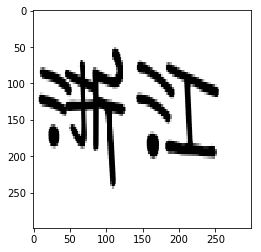

In [37]:
img = iter(val_generator).next()

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img[0])

pred = np.argmax(mymodel.predict(img[0:1]), 1)
classes = ['anhui', 'guangdong', 'jiangsu', 'shanghai', 'sichuan', 'zhejiang']
classes[pred[0]]

'anhui'

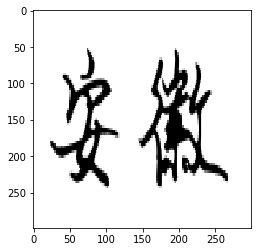

In [38]:
plt.imshow(img[1])

pred = np.argmax(mymodel.predict(img[1:2]), 1)
classes[pred[0]]

'zhejiang'

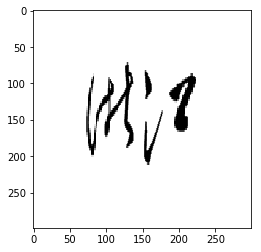

In [39]:
plt.imshow(img[2])

pred = np.argmax(mymodel.predict(img[2:3]), 1)
classes[pred[0]]

'guangdong'

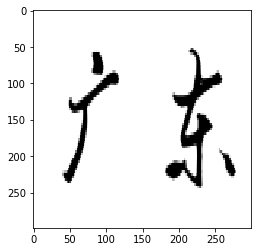

In [40]:
plt.imshow(img[3])

pred = np.argmax(mymodel.predict(img[3:4]), 1)
classes = ['anhui', 'guangdong', 'jiangsu', 'sichuan', 'zhejiang']
classes[pred[0]]

In [15]:
train_image = ImageDataGenerator(rescale=1./255)

train_generator = train_image.flow_from_directory('../data/train/province', target_size=(299, 299),
                                                 batch_size=batch_size,
                                                 class_mode='categorical'
                                                 )

mymodel.evaluate_generator(train_generator, steps=1)

Found 300 images belonging to 6 classes.


[2.9264723707456142e-05, 1.0]